In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline

In [3]:
iris = pandas.read_csv("Iris.txt", sep="\t")

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
pca.fit(scale(iris[iris.columns[:4]]))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
iris_pca = pca.transform(iris[iris.columns[:4]])
iris_pca_df = pandas.DataFrame({
    "Dim1" : iris_pca[:,0], 
    "Dim2" : iris_pca[:,1], 
    "Species" : iris.Species
})

In [16]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = .5, min_samples = 3)
db.fit(scale(iris[iris.columns[:4]]))

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [17]:
iris_pca_db = iris_pca_df.assign(Labels = db.labels_)

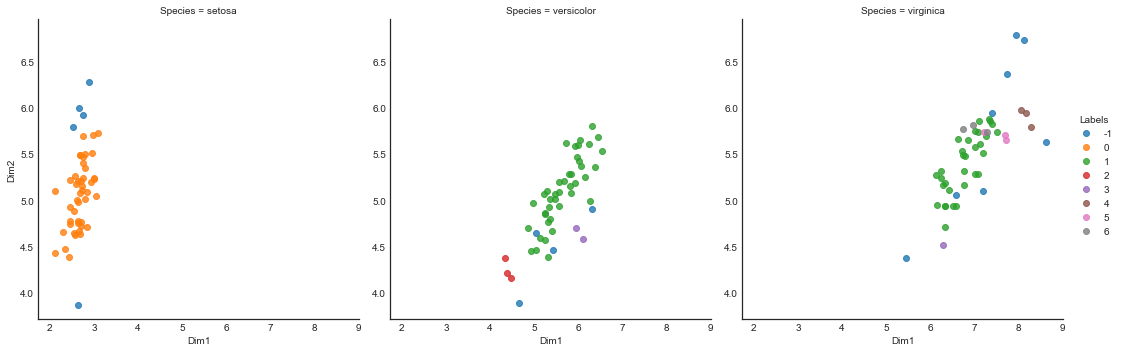

In [18]:
seaborn.lmplot("Dim1", "Dim2", hue = "Labels", col = "Species", data = iris_pca_db, fit_reg = False)

In [19]:
a = [c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]
a.append("chiffre")
print(a)

['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'chiffre']


Text(2.14788,-0.830259,'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]')

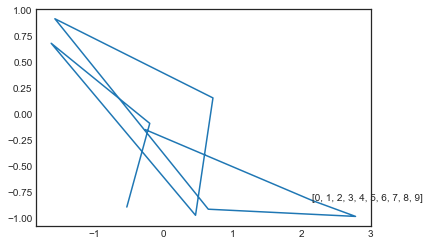

In [37]:
x = numpy.random.normal(size = 10)
y = numpy.random.normal(size = 10)
# print(str(list(range(10))))
plt.plot(x, y)
plt.text(x[1], y[1], str(list(range(10))))

In [38]:
# Importation des données
pen_tes = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes", 
                          header=None)
pen_tra = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", 
                          header=None)

# Rassemblement des deux jeux de données en un seul
pen = pen_tes.copy().append(pen_tra, ignore_index = True)

# Création des noms de variables : x1, y1, x2, y2, ..., chiffre
a = [c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]
a.append("chiffre")
pen.columns = a

# Ajout du chiffre en chaîne de caractère
pen = pen.assign(chiffre_str = [str(c) for c in pen.chiffre])

# Vue des premières lignes du DataFrame
pen.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,chiffre,chiffre_str
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9,9


In [40]:
sub = [pen.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]

In [42]:
xN = ["x" + str(i + 1) for i in range(8)]
sub[0].mean()[xN]

x1    35.372703
x2    11.577428
x3    14.935258
x4    51.172353
x5    85.941382
x6    89.294838
x7    59.011374
x8    22.096238
dtype: float64

In [ ]:
[[s.men[xN], s.mean[yN]] for s in sub]